In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [6]:
import os
print(os.getcwd())

# Load CSV data into a DataFrame
df = pd.read_csv('cve_data_2013_23.csv')

# Print column names to verify
print(df.columns)


/mnt/KSS/Studies/RVCE/CVE/Paper-phase
Index(['cveID', 'vendor', 'product', 'state', 'cwe_description',
       'vector_string', 'cweID', 'assignerShortName', 'datePublished'],
      dtype='object')


In [7]:
# Strip extra spaces from column names if necessary
df.columns = df.columns.str.strip()

# Verify the actual column names
print(df.columns)


Index(['cveID', 'vendor', 'product', 'state', 'cwe_description',
       'vector_string', 'cweID', 'assignerShortName', 'datePublished'],
      dtype='object')


Index(['cveID', 'vendor', 'product', 'state', 'cwe_description',
       'vector_string', 'cweID', 'assignerShortName', 'datePublished'],
      dtype='object')
           cveID     vendor product      state  \
0  CVE-2013-0001  microsoft     NaN  PUBLISHED   
1  CVE-2013-0002  microsoft     NaN  PUBLISHED   
2  CVE-2013-0003  microsoft     NaN  PUBLISHED   
3  CVE-2013-0004  microsoft     NaN  PUBLISHED   
4  CVE-2013-0005  microsoft     NaN  PUBLISHED   

                                     cwe_description vector_string cweID  \
0  The Windows Forms (aka WinForms) component in ...           NaN   NaN   
1  Buffer overflow in the Windows Forms (aka WinF...           NaN   NaN   
2  Buffer overflow in a System.DirectoryServices....           NaN   NaN   
3  Microsoft .NET Framework 1.0 SP3; 1.1 SP1; 2.0...           NaN   NaN   
4  The WCF Replace function in the Open Data (aka...           NaN   NaN   

  assignerShortName        datePublished  
0         microsoft  2013-01-09T18:00:00

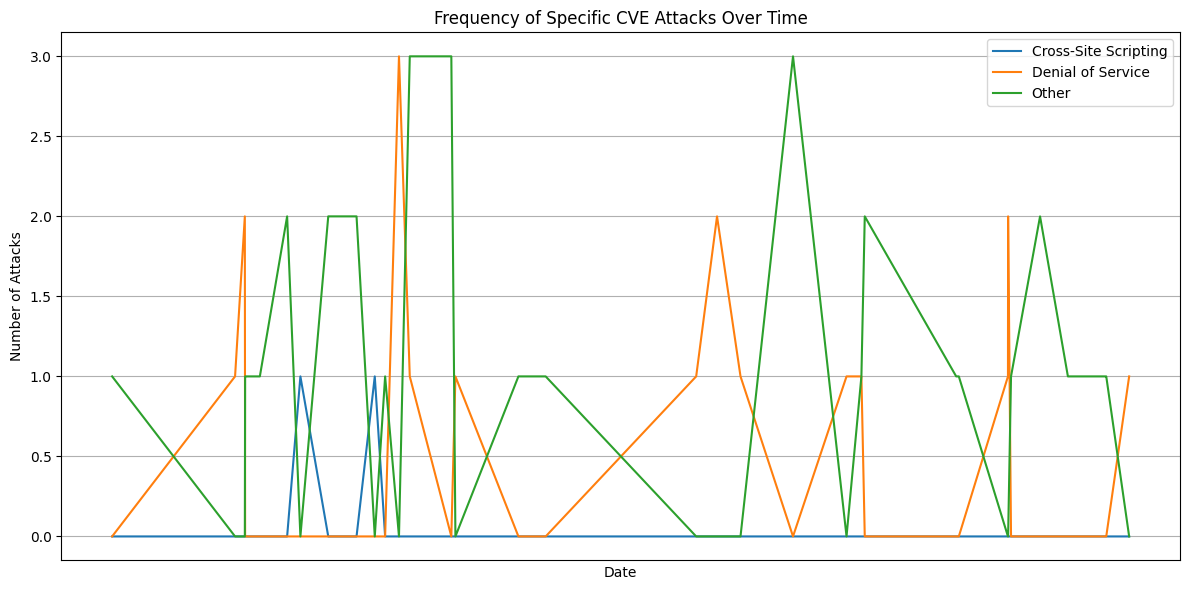

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load CSV data into a DataFrame
csv_file_path = 'cve_data_2013_23.csv'
df = pd.read_csv(csv_file_path)

# Print column names to verify
print(df.columns)

# Verify the first few rows of the DataFrame
print(df.head())

# Ensure the 'cwe_description' column exists
if 'cwe_description' in df.columns:
    # Convert 'cwe_description' to string and categorize attack types
    df['cwe_description'] = df['cwe_description'].astype(str)

    def categorize_by_attack_type(cwe_description):
        if pd.isna(cwe_description):
            return 'Unknown'
        elif 'remote code execution' in cwe_description.lower():
            return 'Remote Code Execution'
        elif 'cross-site scripting' in cwe_description.lower():
            return 'Cross-Site Scripting'
        elif 'denial of service' in cwe_description.lower():
            return 'Denial of Service'
        else:
            return 'Other'

    df['attack_type'] = df['cwe_description'].apply(categorize_by_attack_type)
    df['datePublished'] = pd.to_datetime(df['datePublished'], errors='coerce', format='%Y-%m-%dT%H:%M:%S%z')
    df = df.dropna(subset=['datePublished'])

    # Group by date and attack type
    grouped = df.groupby(['datePublished', 'attack_type']).size().unstack(fill_value=0)

    # Plot
    plt.figure(figsize=(12, 6))
    for attack_type in grouped.columns:
        plt.plot(grouped.index, grouped[attack_type], label=attack_type)

    plt.xlabel('Date')
    plt.ylabel('Number of Attacks')
    plt.title('Frequency of Specific CVE Attacks Over Time')
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The 'cwe_description' column does not exist in the DataFrame.")


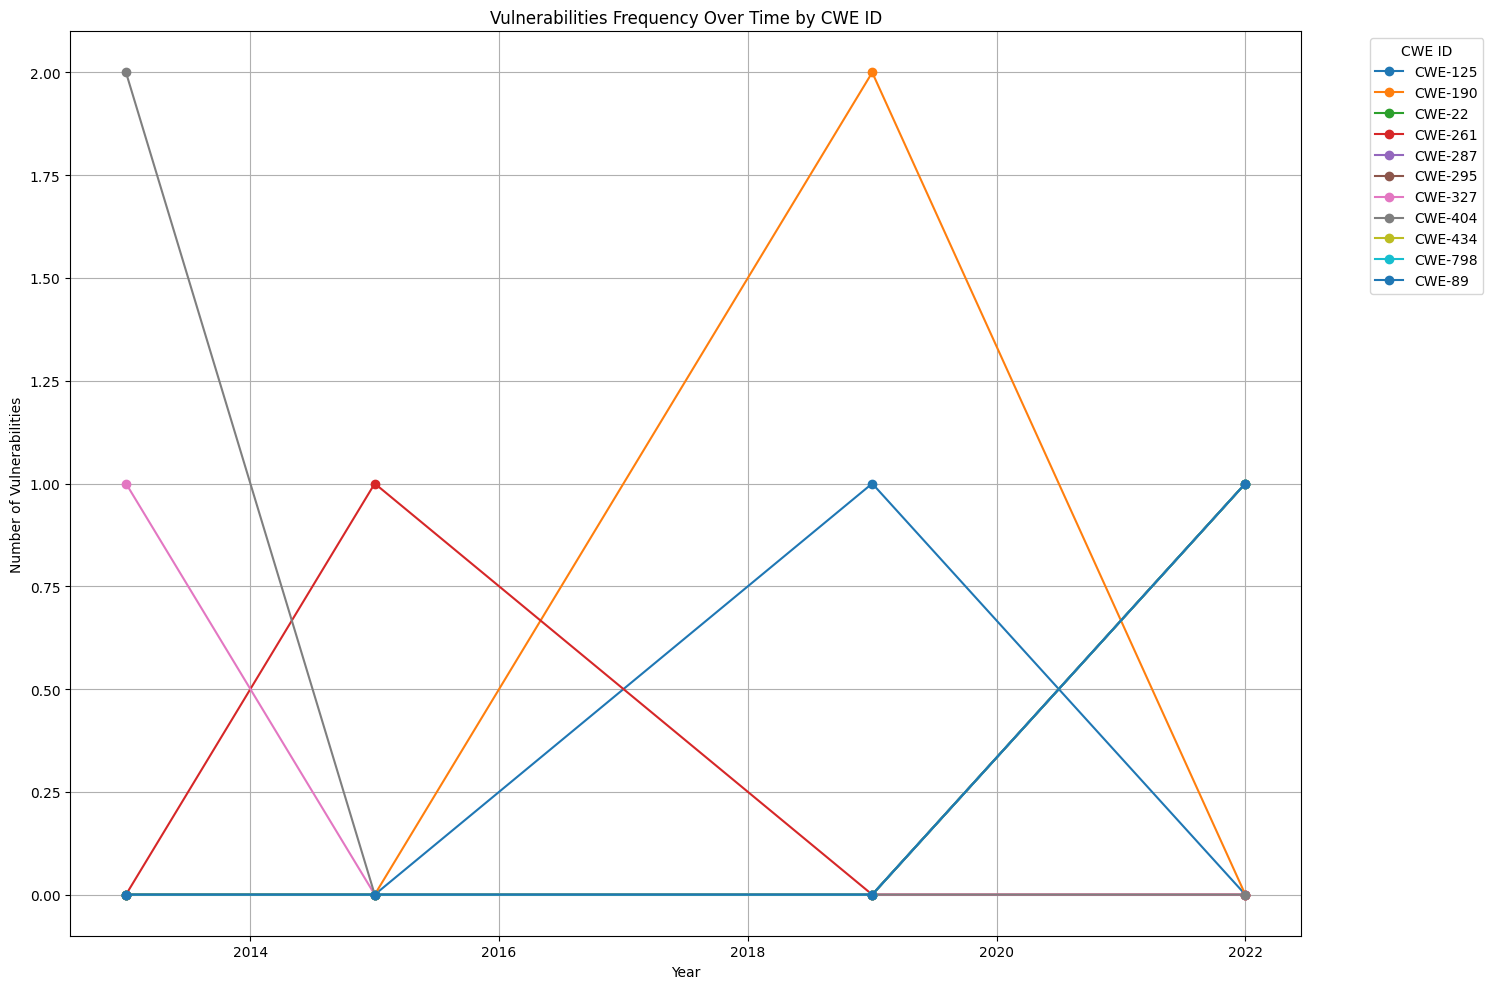

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('cve_data_2013_23.csv')

# Convert the Published_Date to datetime
df['datePublished'] = pd.to_datetime(df['datePublished'], utc=True, errors='coerce')


# Extract the year from Published_Date
df['Year'] = df['datePublished'].dt.year

# Group by Year and CWE_ID and count occurrences
grouped = df.groupby(['Year', 'cweID']).size().reset_index(name='Count')

# Pivot the data to have years as rows and CWE_IDs as columns
pivoted = grouped.pivot(index='Year', columns='cweID', values='Count').fillna(0)

# Plot the data
plt.figure(figsize=(15, 10))
for column in pivoted.columns:
    plt.plot(pivoted.index, pivoted[column], marker='o', label=column)

plt.title('Vulnerabilities Frequency Over Time by CWE ID')
plt.xlabel('Year')
plt.ylabel('Number of Vulnerabilities')
plt.legend(title='CWE ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


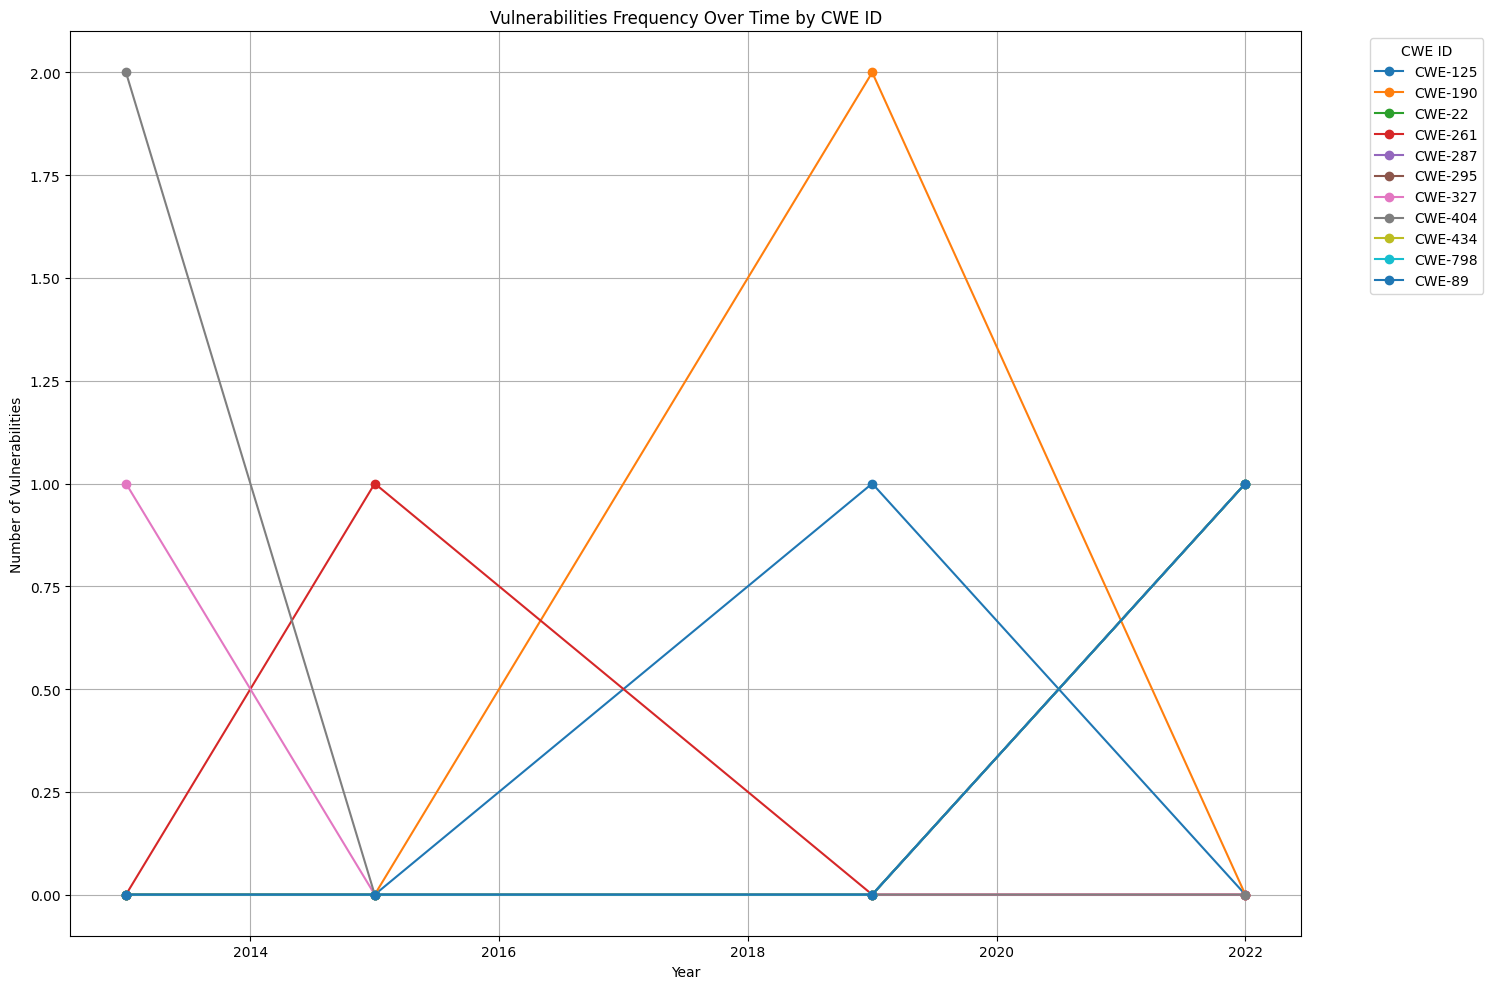

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('cve_data_2013_23.csv')

# Convert the Published_Date to datetime
df['datePublished'] = pd.to_datetime(df['datePublished'], utc=True, errors='coerce')

# Extract the year from Published_Date
df['Year'] = df['datePublished'].dt.year

# Group by Year and CWE_ID and count occurrences
grouped = df.groupby(['Year', 'cweID']).size().reset_index(name='Count')

# Pivot the data to have years as rows and CWE_IDs as columns
pivoted = grouped.pivot(index='Year', columns='cweID', values='Count').fillna(0)

# Map CWE IDs to their descriptions
cwe_descriptions = {
    79: 'Cross-Site Scripting (XSS)',
    89: 'SQL Injection',
    # Add more mappings as needed
}

# Replace CWE IDs with their descriptions
pivoted.columns = [cwe_descriptions.get(cwe, str(cwe)) for cwe in pivoted.columns]

# Plot the data
plt.figure(figsize=(15, 10))
for column in pivoted.columns:
    plt.plot(pivoted.index, pivoted[column], marker='o', label=column)

plt.title('Vulnerabilities Frequency Over Time by CWE ID')
plt.xlabel('Year')
plt.ylabel('Number of Vulnerabilities')
plt.legend(title='CWE ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
cwe_descriptions = {
    79: 'Cross-Site Scripting (XSS)',
    89: 'SQL Injection',
    119: 'Buffer Overflow',
    200: 'Information Exposure',
    264: 'Permissions, Privileges, and Access Controls',
    # Add more mappings as needed
}
